 Autor:  Diego Castejón Molina



# Descripción del Dataset

El Dataset elegido para la práctica 2 consiste en los datos de calidad del aire de la ciudad de Madrid, que se encuentran publicados por en la página web del Ayuntamiento de Madrid. En particular, se analizan los datos medios diarios para los años 2011 a 2018, que se pueden consultar en la siguiente [dirección web](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=aecb88a7e2b73410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default). Haciendo clic en el link anterior, se accede a un repositorio desde el que se pueden descargar los dataset para las medidas recogidas durante los años 2001 a 2018.

Aprovechando que en 2011 entró en vigor un [Plan de Calidad de Aire de Madrid](http://www.mambiente.munimadrid.es/opencms/export/sites/default/calaire/Anexos/Plan_2011_15.pdf), y que no ha sido reemplazado hasta finales de 2018 por el [nuevo Plan de Calidad del Aire](https://www.madrid.es/UnidadesDescentralizadas/Sostenibilidad/CalidadAire/Ficheros/PlanAireyCC_092017.pdf) parece razonable evaluar si el plan antiguo de la ciudad fue eficaz en la reducción de emisiones nocivas para salud entre los años 2011 y 2018. Para ello se podría comprobar entre qué años la reducción (o aumento) de las emisiones fue estadísticamente significativa y para cuales no, intentando determinar si el comportamiento de los diferentes gases es análogo. Por contra, no parece indicado tratar de obtener regresiones que pretenden predecir el comportamiento futuro debido a que el nuevo Plan de Calidad de Aire es más ambicioso que el anterior y la tendencia que pueda determinarse con una regresión no estaría teniendo en cuenta los cambios que se han introducido a partir de 2018.

Los dataset de calidad del aire que se pueden descargar desde la web del Ayuntamiento de Madrid compartida en el primer párrafo se encuentra en formato .txt los anteriores a 2017, y en formato csv los posteriores. Los datos anteriores a 2017 presentan cada registro como una fila de caracteres en la que cada determinado número corresponden con una columna distinta: los primeros ocho se refieren a la estación de medida, los siguientes dos a la magnitud medida (el gas contaminante) los siguientes a la técnica de medida, etc. Para realizar la correcta asignación de los datos se utiliza el [documento](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf) que proporciona el Ayuntamiento de Madrid a efecto de interepretar correctamente los campos. Para los datos de 2017 y 2018 los campos ya vienen identificados y no es necesario el uso del documento a tal efecto.

A continuación se presentan los campos que contienen los Dataset. Existen ligeras diferencias en la forma en la que la información se ha ordenado entre los dataset de 2017 y 2018 respecto a los anteriores, aunque contienen la misma información:

- **Estación:** Código que identifica a la estación de medida.
- **Magnitud:** Código que identifica el gas contaminante medido.
- **Técnica:** Código que identifica la técnica utilizada para medir la concentración de cada gas.
- **Punto Muestreo:** Este atributo combina en una sola columna los tres registros anteriores (Estación, Magnitud y Técnica) para los registros de 2017 y 2018. En los registros anteriores no existe. La forma de combinar los datos anteriores es Estacion_Magnitud_tecnica.
- **Dato diario:** Código, presente sólo en los registros anteriores a 2017, que especifica si el dato es diario (04) y horario (02). En este caso, todos son diarios, por lo que no aporta información.
- **Año:** Identifica el año en el que se hizo la medida.
- **Mes:** Identifica el mes en el que se realizó la medida.
- **Día n:** Una columna para cada día del mes (1-31) con cada valor de medido. Para los meses que no tienen 31 días, puede haber ceros, Nan, u otro valor no identificado. En los registro anteriores a 2017, cada valor viene acompañado de V o N (valor válido-V o no válido-N). En los registros de 2017 en adelante, hay una columna aparte de contiene la información de V o N.
- **Provincia:** Presente sólo en los datos de 2017 en adelante, código que identifica la provincia en la que se tomaron los datos. No aporta información,todos los son de Madrid.
- **Municipio:** Presente sólo en los datos de 2017 en adelante, código que identifica el municipio en la que se tomaron los datos. No aporta información,todos los son de Madrid.
- **Validación:** Presente como columnas independientes solo en los datos de 2017 en adelante, al lado de la columna correspondiente a cada día. Contiene V si el valor diario es válido y N si no lo es.

Como puede verse, los datos no se presentan de una forma que permita trabajar facilmente con ellos, además de que no se presentan en el mismo formato. Es por ello que un trabajo de integración y limpieza es necesario como paso previo para realizar un análisis que permita determinar si el Plan de Calidad del Aire que se implantó en el año 2011 sirvió para reducir la emisiones de gases nocivos para la salud y en qué medida se redujeron (o aumentaron) las emisiones.


# Integración y selección de los datos de interés a analizar

Como paso previo a la selección de los datos de interés, parece razonable integrar los ocho Dataset que se han descargado en un único Dataset, de forma que los datos se encuentren en un mismo formato y con los campos estructurados de forma que sea sencillo trabajar con ellos.

Como primer paso, se cargan todos los datos, juntando en un mismo Dataset aquellos que presentan la misma estructura.

In [1]:
# Importamos la libreria pandas, que utilizaremos para hacer la mayor parte 
# de las tareas.

import pandas as pd

# Comenzamos leyendos los archivos:

# Hay dos tipos de archivos, los de 2017 y 2018 y los anteriores a 2017.

# Nuevos:

datos18 = pd.read_csv(".\datos\datos201810.CSV", sep = ";")

datos17 = pd.read_csv(".\datos\datos17.csv", sep = ";")

datosn = pd.concat([datos18,datos17])

# Viejos:

datos11 = pd.read_csv(".\datos\datos11.txt", header = None)

datos12 = pd.read_csv(".\datos\datos12.txt", header = None)

datos13 = pd.read_csv(".\datos\datos13.txt", header = None)

datos14 = pd.read_csv(".\datos\datos14.txt", header = None)

datos15 = pd.read_csv(".\datos\datos15.txt", header = None)

datos16 = pd.read_csv(".\datos\datos201612.txt", header = None)

datosv = pd.concat([datos11,datos12,datos13,datos14,datos15,datos16])

De este modo, ya hemos reducido de ocho a dos el número de Datasets que estamos manejando. El siguiente paso consiste en trabajar con los datos viejos, que como se ha comentado anteriormente, no tiene los campos separados:

In [2]:
# Como se puede ver, los datos anteriores a 2017 recogen toda la información 
# de cada registro en un largo string:

print(datosv.head())

                                                   0
0  28079004013804110100008V00009V00009V00006V0000...
1  28079004013804110200011V00016V00017V00016V0001...
2  28079004013804110300008V00009V00009V00007V0000...
3  28079004013804110400009V00009V00008V00007V0000...
4  28079004013804110500006V00006V00006V00007V0000...


Por tanto, y mediante el [documento](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf) intérprete, tenemos que separar los caracteres en campos. De igual manera, no parece razonable tener un campo para cada día, parece más razonable reducir esos 31 campos a 2 (Día y Medida). Además, también resulta razonable separar de la medida la parte de validación (V/N). Finalmente, los campos Técnica y Tipo dato no aportan información útil para el análisis que se quiere hacer, por lo que parece razonable no tomar dichos campos. Y esto se realiza con el código siguiente:

In [3]:
# Pasemos primero los viejos a un formato que se pueda entender minimamente:
# Comenzamos a separar los campos:

datosvn = pd.DataFrame()

# Los campos "descriptivos"

datosvn['Estación'] = datosv[0].astype(str).str[:8]

datosvn['Magnitud'] = datosv[0].astype(str).str[8:10]

datosvn['Técnica'] = datosv[0].astype(str).str[10:12]

datosvn['Tipo dato'] = datosv[0].astype(str).str[12:14]

datosvn['Año'] = datosv[0].astype(str).str[14:16]

datosvn['Mes'] = datosv[0].astype(str).str[16:18]

# Y los de los valores:

for i in range(1,32):
    texto = str(i)
    a = 18 + (i-1)*6
    b = 18 + (i)*6
    datosvn[texto] = datosv[0].astype(str).str[a:b]
    
# Ahora vamos a transponer columnas y filas. Es mucho más cómodo tener una 
# columna que sea día y otra que sea valor en 
# vez de 31 columnas.

datosvn = datosvn.melt(id_vars=["Estación","Magnitud","Técnica","Tipo dato",
                                "Año","Mes"],var_name = "Día", 
                       value_name = "Medida")

# Separamos la última columna en dos, (Medida y validación)

datosvn["Validacion"] = datosvn["Medida"].str[-1:]
datosvn["Medida"] = datosvn["Medida"].str[:-1]
datosvn["Medida"] = datosvn["Medida"].astype(float)

# Y elegimos los campos que queremos conservar:

datosvn = datosvn[["Estación", "Magnitud", "Año", "Mes", "Día", "Medida", 
                   "Validacion"]]

# Y podemos ver un Dataset algo más ordenado:

print(datosvn.head())

   Estación Magnitud Año Mes Día  Medida Validacion
0  28079004       01  11  01   1     8.0          V
1  28079004       01  11  02   1    11.0          V
2  28079004       01  11  03   1     8.0          V
3  28079004       01  11  04   1     9.0          V
4  28079004       01  11  05   1     6.0          V


Ahora toca realizar cambios análogos a los realizados anteriormente con el set que contiene los datos de 2017 y 2018. En este caso, además de los cambios señalados anteriormente, parece razonable también dejar caer los campos Provincia y Municipio, pues no aportan ningún tipo de información adicional. El código que se utiliza es el siguiente:

In [4]:
# Ahora vamos a colocar en el mismo formato los datos de los años 2017 y 
# 2018

# Primero vamos a realizar la trasposición de las columnas de dias y 
# validación:

datosn1 = datosn[["PUNTO_MUESTREO","ANO","MES","D01","D02","D03","D04",
                  "D05","D06","D07","D08","D09","D10","D11","D12",
                 "D13","D14","D15","D16","D17","D18","D19","D20",
                 "D21","D22","D23","D24","D25","D26","D27","D28",
                  "D29","D30","D31"]]

datosn2 = datosn[["PUNTO_MUESTREO","ANO","MES","V01","V02","V03","V04",
                  "V05","V06","V07","V08","V09","V10","V11","V12","V13"
                 ,"V14","V15","V16","V17","V18","V19","V20",
                 "V21","V22","V23","V24","V25","V26","V27","V28",
                  "V29","V30","V31"]]

# Hacemos la transposición por separado

datosn1 = datosn1.melt(id_vars = ["PUNTO_MUESTREO","ANO","MES"],
                       var_name = "Día", value_name = "Medida")

datosn2 = datosn2.melt(id_vars = ["PUNTO_MUESTREO","ANO","MES"],
                       var_name = "Día", value_name = "Validacion")

datosn1["Día"] = datosn1["Día"].str.replace("D","")

datosn2["Día"] = datosn1["Día"].str.replace("V","")

# Pero luego unimos

datosn = datosn1.merge(datosn2, on = ["PUNTO_MUESTREO","ANO","MES", "Día"])

# Ahora separamos el campo punto de muestreo en sus tres partes:

datosn["Estación"] = datosn["PUNTO_MUESTREO"].str.split("_", expand = True)[0]
datosn["Magnitud"] = datosn["PUNTO_MUESTREO"].str.split("_", expand = True)[1]
datosn["Técnica"] = datosn["PUNTO_MUESTREO"].str.split("_", expand = True)[2]

# Seleccionamos las columnas con las que queremos trabajar:

datosn = datosn[["Estación", "Magnitud", "ANO", "MES", "Día", "Medida", 
                 "Validacion"]]

# Cambiamos los nombres de las columnas para que coincidan con los del 
# conjunto "viejo"

datosn.columns = ["Estación", "Magnitud", "Año", "Mes", "Día", "Medida", 
                  "Validacion"]

# Y tenemos un Dataset con una estructura idéntica al anterior:

print(datosn.head())

   Estación Magnitud   Año  Mes Día  Medida Validacion
0  28079004        1  2018    1  01     1.0          V
1  28079004        1  2018    2  01     5.0          V
2  28079004        1  2018    3  01     1.0          V
3  28079004        1  2018    4  01     2.0          V
4  28079004        1  2018    5  01     2.0          V


Al tener ambos Dataset la misma estructura, podemos unirlos en uno solo, que será el que se utilizará de ahora en adelante para realizar la todas las transformaciones de limpieza y el posterior análisis a lo largo de la práctica.

In [5]:
# Ahora que tenemos todos los datos en un formato similar, podemos 
# unirlos en un único DataFrame 

datos = pd.concat([datosn,datosvn])

No obstante, parece razonable preguntarnos si para el análisis necesitamos toda la información que hemos introducido en dicho Dataset. ¿Si queremos analizar si el Plan ha sido eficaz es necesario analizar los 17 gases con efecto sobre la salud de los que el Ayuntamiento toma registros?

Quizás parece más asequible y razonable estudiar y analizar únicamente los más nocivos para la salud. Para ello, [este artículo de la OMS](https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health) nos describe cuales son los gases más importantes a tener en cuentra por sus efectos sobre la salud:

- Partículas ($PM_{2.5}$ y $PM_{10}$)
- Ozono ($O_{3}$)
- Dióxido de Nitrógeno ($NO_{2}$)
- Dióxido de Azufre ($SO_{2}$)

Parece razonable hacer una selección en el Dataset que hemos creado y quedarnos con estos cinco gases y, de paso, cambiar el código que los identifica por su nombre. Esto se realiza con el código siguiente:

In [6]:
# Primero parece razonable ver el campo "Magnitud", para ver como 
# son los valores que hay en él:

print (datos["Magnitud"].unique())

['1' '6' '7' '8' '12' '9' '10' '14' '20' '30' '35' '42' '43' '44' '01'
 '06' '07' '08' '09']


In [7]:
# Y parece que los valores menores a 10 algunos vienen con cero y 
# otros no.

# Primero añadimos ceros a todos los menores a 10:

datos["Magnitud"] = datos["Magnitud"].apply(lambda x: x.zfill(2))

# Y ahora reemplazamos nombres:

# PM2.5

datos["Magnitud"] = datos["Magnitud"].str.replace("09","PM25")

# PM10

datos["Magnitud"] = datos["Magnitud"].str.replace("10","PM10")

# O3

datos["Magnitud"] = datos["Magnitud"].str.replace("14","O3")

# NO2

datos["Magnitud"] = datos["Magnitud"].str.replace("08","NO2")

# SO2

datos["Magnitud"] = datos["Magnitud"].str.replace("01","SO2")

# Finalmente seleccionamos solo los registros de estos cinco gases:

datos = pd.concat([datos[datos["Magnitud"]=="PM25"],
                   datos[datos["Magnitud"]=="PM10"],
                   datos[datos["Magnitud"]=="O3"],
                 datos[datos["Magnitud"]=="NO2"],
                   datos[datos["Magnitud"]=="SO2"]])


De este modo, ya se han integrado todos los datos en un único DataFrame y se han seleccionado los campos y registros con los que se quiere trabajar. Es ahora el momento de comenzar la limpieza de los datos.

# Limpieza de datos

Lo primero que podemos hacer es ver un pequeño resumen de cada uno de los campos:


In [8]:
# Empezamos haciendo un resumen general de todos los campos:

print(datos.describe(include = "all"))

        Estación Magnitud     Año     Mes     Día         Medida Validacion
count     192138   192138  192138  192138  192138  191283.000000     191283
unique        24        5       8      24      40            NaN          7
top     28079008      NO2      16      04      16            NaN          V
freq       14570    69936   24552   12276    6198            NaN     186447
mean         NaN      NaN     NaN     NaN     NaN      29.705959        NaN
std          NaN      NaN     NaN     NaN     NaN      51.609899        NaN
min          NaN      NaN     NaN     NaN     NaN       0.000000        NaN
25%          NaN      NaN     NaN     NaN     NaN      10.000000        NaN
50%          NaN      NaN     NaN     NaN     NaN      23.000000        NaN
75%          NaN      NaN     NaN     NaN     NaN      44.000000        NaN
max          NaN      NaN     NaN     NaN     NaN   19351.000000        NaN


Que ya nos señala que parece que hay algunos problemas en Mes (24 meses distintos), en Día (40 días diferentes) y en Validación (debería ser V o N y nos dice que hay 7 valores únicos). Por otro lado, el campo Magnitud ya lo hemos tratado en la sección anterior, por lo que no se necesita volver a revisar, el campo estación tiene 24 estaciones distintas, lo que coincide con el [documento](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf) del Ayuntamiento, por lo que no parece que tampoco haya ningún problema con ello. Por otro lado, no tenemos información clara sobre los posibles errores que podría haber en la variable medida.

Se van a analizar los campos anteriores de uno en uno:

In [9]:
# Empezamos con Estación

print (datos["Estación"].unique())

['28079008' '28079024' '28079038' '28079047' '28079048' '28079050'
 '28079018' '28079036' '28079040' '28079055' '28079057' '28079060'
 '28079016' '28079017' '28079027' '28079035' '28079039' '28079049'
 '28079054' '28079056' '28079058' '28079059' '28079004' '28079011']


Como se esperaba, son las 24 estaciones que ha estado operativas en el periodo que se está analizando, por lo que no hay nada que corregir en este campo,

In [10]:
# Año

print (datos["Año"].unique())

[2018 2017 '11' '12' '13' '14' '15' '16']


El formato del año no es uniforme entre todos los registros, por lo que parece razonable unificarlo. Se usará el formato 20xx:

In [11]:
# Cambiamos el formato del año:

datos["Año"] = datos["Año"].astype(str)

for i in range(1,7):
    en = "1"+str(i)
    sal = "201"+str(i)
    datos["Año"] = datos["Año"].str.replace(en,sal)

datos["Año"] = datos["Año"].astype(int)
    
print (datos["Año"].unique())

[2018 2017 2011 2012 2013 2014 2015 2016]


Vamos ahora con el mes:

In [12]:
# Mes

print (datos["Mes"].unique())

[1 2 3 4 5 6 7 8 9 10 11 12 '01' '02' '03' '04' '05' '06' '07' '08' '09'
 '10' '11' '12']


Este parece más facil de resolver, en principio debería bastar con poner todos como enteros:

In [13]:
# Cambiamos los registros a enteros

datos["Mes"] = datos["Mes"].astype(int)

print (datos["Mes"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


Revisemos ahora los días:

In [14]:
# Día

print (datos["Día"].unique())

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' '1' '2' '3' '4' '5' '6' '7' '8' '9']


Y se debería resolver de la misma forma que la variable Mes

In [15]:
datos["Día"] = datos["Día"].astype(int)

print (datos["Día"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


De las variables que estaban catalogadas como categóricas, ya solo queda validación. Veamos a ver por qué hay más de dos valores:

In [16]:
# Validación

print (datos["Validacion"].unique())

['V' 'N' 'V00000N00000N00000N' 'N00000N00000N00000N' nan 'V00000N' 'M'
 'N00000N']


Parece que además de V y N hay otros registros que combinan ceros V y N, registros con la letra M y registros con Nan. Evaluemos cada uno de ellos:

In [17]:
# Vamos a empezar mirando algunos registros con 
# V00000N00000N00000N:

s = datos["Validacion"].unique()

t = datos[datos["Validacion"]==s[2]]

print(t.head(10))


       Estación Magnitud   Año  Mes  Día  Medida           Validacion
89623  28079008     PM25  2018    2   28     8.0  V00000N00000N00000N
90023  28079024     PM25  2018    2   28     7.0  V00000N00000N00000N
90307  28079038     PM25  2018    2   28     8.0  V00000N00000N00000N
90487  28079047     PM25  2018    2   28     8.0  V00000N00000N00000N
90537  28079048     PM25  2018    2   28     6.0  V00000N00000N00000N
90627  28079050     PM25  2018    2   28     6.0  V00000N00000N00000N
91145  28079008     PM25  2017    2   28     6.0  V00000N00000N00000N
91625  28079024     PM25  2017    2   28     4.0  V00000N00000N00000N
91973  28079038     PM25  2017    2   28     4.0  V00000N00000N00000N
92249  28079048     PM25  2017    2   28     5.0  V00000N00000N00000N


¿Será casualidad o solo ocurre esto en los días 28 de febrero?

In [18]:
# Veamos si esto ocurre solo con los días 28 de febrero:

print (t["Día"].unique())
print (t["Mes"].unique())

[28]
[2]


Los registros apuntan a que es un error que sistemáticamente se comete en los datos. Parece ser que en algunos 28 de febrero se apunta el código de validación no solo del 28, sino del 29, 30 y 31 debido a que el mes no tiene 31 días. Es posible que esto sea fuente de Nan. Antes de realizar cambios en esta variable, vamos a analizar todos los demás incidentes que se han visto:

In [19]:
# Vamos a mirar registros con N00000N00000N00000N:

t = datos[datos["Validacion"]==s[3]]

print(t.head(10))

       Estación Magnitud   Año  Mes  Día  Medida           Validacion
92189  28079047     PM25  2017    2   28     4.0  N00000N00000N00000N
92201  28079047     PM10  2017    2   28     6.0  N00000N00000N00000N


Y podemos ver que también ocurre como en el caso anterior, 28 de febrero y, potencialmente, la fuente de seis Nan. Sigamos mirando el resto de incidentes:

In [20]:
# Vamos a mirar registros con V00000N:

t = datos[datos["Validacion"]==s[5]]

print(t.head(10))

       Estación Magnitud   Año  Mes  Día  Medida Validacion
96257  28079008     PM25  2018    4   30     3.0    V00000N
96259  28079008     PM25  2018    6   30    13.0    V00000N
96262  28079008     PM25  2018    9   30    11.0    V00000N
96941  28079038     PM25  2018    4   30     3.0    V00000N
96943  28079038     PM25  2018    6   30    12.0    V00000N
96946  28079038     PM25  2018    9   30    11.0    V00000N
97121  28079047     PM25  2018    4   30     3.0    V00000N
97123  28079047     PM25  2018    6   30    11.0    V00000N
97126  28079047     PM25  2018    9   30    13.0    V00000N
97171  28079048     PM25  2018    4   30     3.0    V00000N


Parece que ocurre en día 30 de los meses que tienen 30 días:

In [21]:
# Verifiquemos si ocurre en el día 30 de los meses con 30 días:

print (t["Día"].unique())
print (t["Mes"].unique())

[30]
[ 4  6  9 11]


Y efectivamente, ocurre en dichos meses. Tenemos identificada otra posible fuente de Nan. Sigamos:

In [22]:
# Vamos a mirar registros con N00000N:

t = datos[datos["Validacion"]==s[-1]]

print(t.head(10))

       Estación Magnitud   Año  Mes  Día  Medida Validacion
98170  28079018       O3  2017   11   30    34.0    N00000N
98729  28079039       O3  2017    6   30    62.0    N00000N
98134  28079018      NO2  2017   11   30    49.0    N00000N
98705  28079039      NO2  2017    6   30    17.0    N00000N
99387  28079059      NO2  2017    4   30     4.0    N00000N
98098  28079018      SO2  2017   11   30     7.0    N00000N


Y en este caso ocurre como en el anterior, el error tiene lugar en el día 30 de los meses con 30 días. Otra fuente de posibles Nan identificada. Nos queda ahora revisar los valores Nan y determinar si los valores Nan que aparecen se pueden explicar con los errores que hemos identificado anteriormente.

In [23]:
# Vamos a contar el número de Nan que hay en total:

print ("Número de Nans: ",datos["Validacion"].isna().sum())

# Y ver cuantos Nan podemos explicar:
# 3 por cada V00000N00000N00000N o N00000N00000N00000N
# 1 por cada V00000N o N00000N

t = (datos[datos["Validacion"]==s[-1]].shape[0] +  
     datos[datos["Validacion"]==s[5]].shape[0] +
    datos[datos["Validacion"]==s[3]].shape[0]*3 + 
     datos[datos["Validacion"]==s[2]].shape[0]*3)

print ("Número de Nans que podemos explicar: ", t)

Número de Nans:  855
Número de Nans que podemos explicar:  855


Se pueden explicar todos los Nan perfectamente, lo que nos permite borrarlos sabiendo que no nos exponemos a perder ningún tipo de información. Finalmente, nos queda determinar que realizar con el valor M. Revisando el [documento](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf) del Ayuntamiento, se indica claramente que si no es V, no es válido, por lo que se entiende que M debe ser equivalente a N. Resumiendo, se deben tomar las siguientes tareas:

- Los valores V00000N00000N00000N y V00000N deben sustituirse por V.
- Todos los registros que en el campo validación no tienen V deben eliminarse.

Esto se realiza con el código siguiente:

In [24]:
# Cambiamos V00000N00000N00000N y V00000N por V:

datos["Validacion"] = datos["Validacion"].str.replace("V00000N00000N00000N","V")
datos["Validacion"] = datos["Validacion"].str.replace("V00000N","V")
                                                      
# Y nos quedamos únicamente con los datos válidos (V):

datos = datos[datos["Validacion"]=="V"]

De este modo ya se han analizado y corregido todos los campos que, de forma inicial, pandas había reconocido como categóricos. El paso siguiente, por lo tanto, consiste en analizar la variable numérica que contiene todas las medidas, en busca tanto de posibles Nan que se hayan podido colar como de posibles valores extremos (*outliers*). Comencemos buscando valores nan:

In [25]:
# Ahora se revisan los valores de la columna Medidas. Se comienzan 
# buscando posibles valores Nan:

print ("Número de Nans: ",datos["Medida"].isna().sum())

Número de Nans:  0


La limpieza previa ha impedido que hayan pasado Nan, podemos ahora evaluar si hay valores nulo y en caso afirmativo cuantos hay:

In [26]:
# Revisamos ahora si hay valores nulos y cuantos hay:

print ("Número de nulos: ",datos["Medida"].isnull().sum())

Número de nulos:  0


Tampoco hay valores nulos. Finalmente, podemos verificar si hay valores cero y, en caso afirmativo, intentar explicar por qué podrían estar ahí.

In [27]:
# Revisamos ahora si hay valores ceros y cuantos hay:

print ("Número de ceros: ",datos[datos["Medida"]==0].shape[0])

Número de ceros:  0


A priori, todos los valores deberían ser registros válidos. No obstante, lo mejor es dibujar gráficas de todos los gases en busca de posibles valores extremos. Quizás lo más adecuado sea combinar diagrama de cajas con diagrama de violín para tener un idea sobre la distribución y sobre los principales descriptores estadísticos de las medidas de cada gas. A continuación se muestra el código para realizar las gráficas y también las propias gráficas:

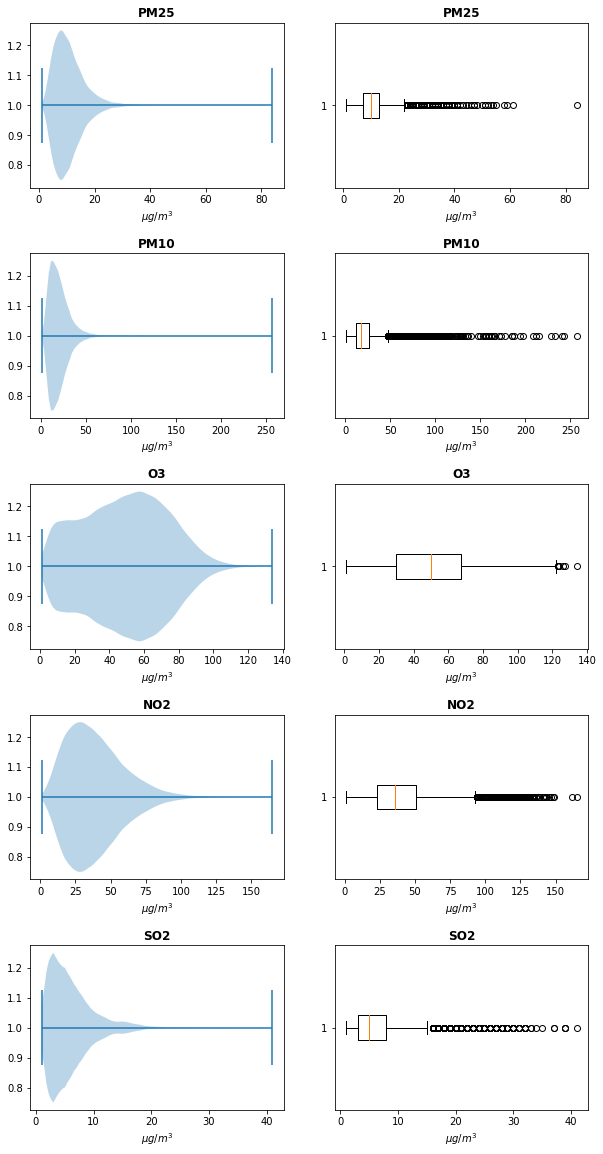

In [28]:
# Importamos la biblioteca matplotlib y autorizamos a que se muestren 
# las gráficas en el markdown

import matplotlib.pyplot as plt
%matplotlib inline

# Definimos las dimensiones de la figura que se va a graficar:

fig, ax = plt.subplots(5,2,figsize=(10,20))

# Obtenemos la lista de los gases que se van a estudiar:

lista = datos["Magnitud"].unique()

# Ponemos un loop para hacer el gráfico:

for i in range(0,5):
    ax[i,0].violinplot(datos[datos["Magnitud"] == lista[i]]["Medida"], 
                       vert = False)
    ax[i,0].set_title(lista[i],fontweight="bold")
    ax[i,0].set_xlabel(r'$\mu g/m^{3}$')
    ax[i,1].boxplot(datos[datos["Magnitud"] == lista[i]]["Medida"], 
                    vert = False)
    ax[i,1].set_title(lista[i],fontweight="bold")
    ax[i,1].set_xlabel(r'$\mu g/m^{3}$')
    
plt.subplots_adjust(hspace=0.4)
plt.show()

En base a las gráficas anteriores se puede ver que existe una cantidad relativamente generosa de valores extremos. Vamos a intentar recopilar más información sobre ellos. Primero se intentará recopilar cuantos outliers hay para cada gas.

In [30]:
# Vamos a contar los outliers:

import numpy as np
from scipy import stats
   
for i in range(0,5):    
    a = np.abs(stats.zscore(datos[datos["Magnitud"] == lista[i]]["Medida"]))
    texto = "\nPara "+lista[i]+" se han contado los siguientes outliers: "
    print(texto,len(a[np.where(a > 3)]))



Para PM25 se han contado los siguientes outliers:  257

Para PM10 se han contado los siguientes outliers:  366

Para O3 se han contado los siguientes outliers:  10

Para NO2 se han contado los siguientes outliers:  572

Para SO2 se han contado los siguientes outliers:  377


Se puede ver que de media, hay unos 30 valores extremos al año para cada gas. Parece que estos valores son facilmente atribuibles a días en los que, por las condiciones climáticas y de desplazamientos, los valores registrados por las estaciones se encontraban disparados. Pese a ser considerados como válidos por el Ayuntamiento, para evaluar el éxito del plan no se pueden tener en cuenta estos valores, pues pueden distorsionar las comparaciones estadísticas que se realicen en el siguiente apartado, donde se evaluará, mediante test estadísticos, si los valores medios anuales se han ido reduciendo de forma anual o si, al menos, se han reducido desde 2011 a 2018 de forma estadísticamente significativa.

Por lo tanto, vamos a eliminar estos valores extremos. Aunque es conocido que el uso de la *Median Absolute Deviation* es más robusto para la detección de outliers, el enorme número de datos válidos para cada gas (del orden de decenas de miles) frente al pequeño número de *ouliers* y sus valores que como mucho llega a 10 veces la media, parece razonable, en este caso, utilizar como discriminante unas métricas basadas en los valores de desviación estándar y valor medio. No obstante, en un caso en el que la diferencia entre el número de valores válidos y *outliers* más sus valores no sea tan significativa, se obtendrán resultados mucho más robustos utilizando las métricas relacionadas con la mediana. La eliminación de los valores extremos se realiza con el código siguiente:


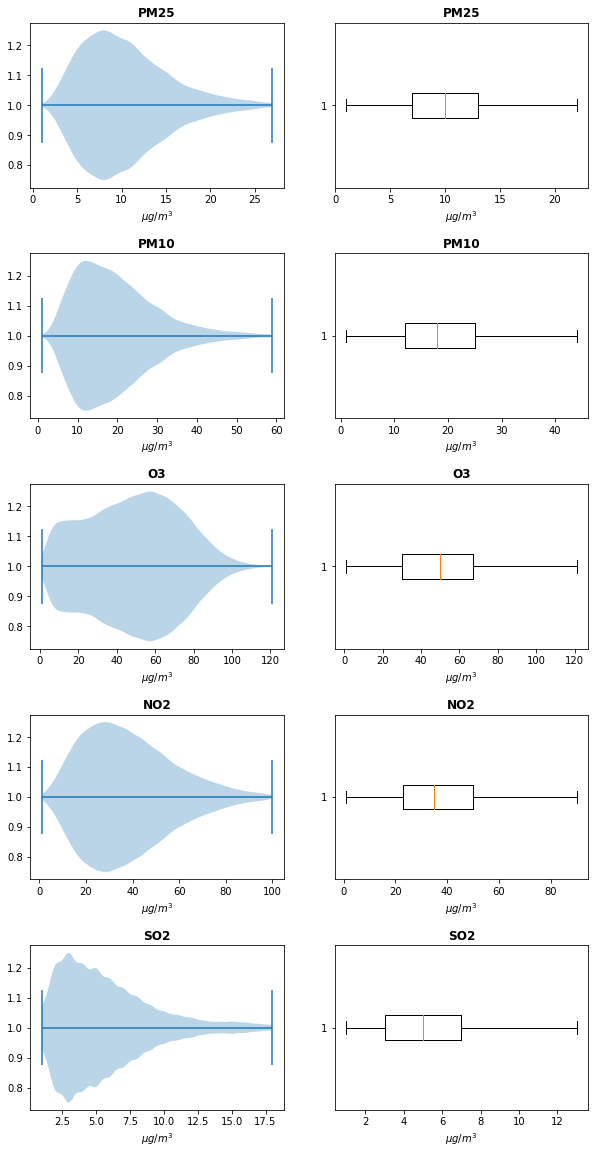

In [31]:
# Empecemos con PM25. 
# Primero calcularemos el valor que se desvía 3 desviaciones estándar 
# de la media. Gracias a los gráficos anteriores, podemos saber que no 
# hay outliers "por abajo":

media = np.mean(datos[datos["Magnitud"] == lista[0]]["Medida"])
desv = np.std(datos[datos["Magnitud"] == lista[0]]["Medida"])
out = media + 3*desv

# Filtramos:

pm25 = datos[(datos["Magnitud"] == lista[0])& (datos["Medida"] < out)]

# Y repetimos con todos los gases:

# PM10
media = np.mean(datos[datos["Magnitud"] == lista[1]]["Medida"])
desv = np.std(datos[datos["Magnitud"] == lista[1]]["Medida"])
out = media + 3*desv

# Filtramos:

pm10 = datos[(datos["Magnitud"] == lista[1])& (datos["Medida"] < out)]

# O3
media = np.mean(datos[datos["Magnitud"] == lista[2]]["Medida"])
desv = np.std(datos[datos["Magnitud"] == lista[2]]["Medida"])
out = media + 3*desv

# Filtramos:

o3 = datos[(datos["Magnitud"] == lista[2])& (datos["Medida"] < out)]

# NO2
media = np.mean(datos[datos["Magnitud"] == lista[3]]["Medida"])
desv = np.std(datos[datos["Magnitud"] == lista[3]]["Medida"])
out = media + 3*desv

# Filtramos:

no2 = datos[(datos["Magnitud"] == lista[3])& (datos["Medida"] < out)]

# SO2
media = np.mean(datos[datos["Magnitud"] == lista[4]]["Medida"])
desv = np.std(datos[datos["Magnitud"] == lista[4]]["Medida"])
out = media + 3*desv

# Filtramos:

so2 = datos[(datos["Magnitud"] == lista[4])& (datos["Medida"] < out)]

# Finalmente, juntamos todo:

datos = pd.concat([pm25, pm10, o3, no2, so2])

# Y volvemos a graficar, para verificar que hemos eliminado los valores extremos

fig, ax = plt.subplots(5,2,figsize=(10,20))

for i in range(0,5):
    ax[i,0].violinplot(datos[datos["Magnitud"] == lista[i]]["Medida"], 
                       vert = False)
    ax[i,0].set_title(lista[i],fontweight="bold")
    ax[i,0].set_xlabel(r'$\mu g/m^{3}$')
    ax[i,1].boxplot(datos[datos["Magnitud"] == lista[i]]["Medida"], 
                    vert = False, showfliers = False)
    ax[i,1].set_title(lista[i],fontweight="bold")
    ax[i,1].set_xlabel(r'$\mu g/m^{3}$')
    
plt.subplots_adjust(hspace=0.4)
plt.show()

Ahora que se han eliminado los valores extremos, tanto los boxplots como los diagramas de violín tiene una presencia bastante diferente. Por lo tanto, podemos dar por terminada la limpieza de datos y comenzar con el análisis de los mismos.

# Análisis de los datos

Una vez que ya se han preparado definitivamente los datos para su análisis, podemos proceder a evaluar, para los cinco gases que se han seleccionado, si realmente ha existido una mejora en las emisiones anuales en la ciudad de Madrid. Para ello, se realizarán diversos análisis:

- Se calcularán los resumenes estadísticos por cada gas emitido.
- Se graficarán los resultados en los grupos anuales para evaluar si pueden existir tendencias.
- Se comprobarán la normalidad y la homogeneidad de las varianzas.
- A partir de los resultados obtenidos en los gráficos, se seleccionarán entre qué años se realizarán test estadísticos para verificar si las diferencias encontradas en las medias son estadísticamente significativas.

Es importante señalar que no se lleva a cabo ninguna regresión debido a que un nuevo plan de calidad del aire ha entrado en vigor en 2018 y las predicciones que se podrían sacar con dicho modelo no estarían teniendo en cuenta las cambios a futuro, por lo que no serían últiles.

## Análisis de $PM_{2.5}$

En esta sección, se analizan los resultados para $PM_{2.5}$. Siguiendo los pasos señalados, lo primero consisten en obtener los resúmenes estadísticos:

In [33]:
# Vamos a calcular los resumenes estadísticos para PM25:

t = datos[datos["Magnitud"] == lista[0]]

print(t["Medida"].describe())

count    16192.000000
mean        10.250618
std          4.669253
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         24.000000
Name: Medida, dtype: float64


Se puede ver que el valor de la desviación estándar es practicamente la mitad del valor medio, lo que nos indica una gran variabilidad que podría estar explicada tanto por un prograsivo descenso como por un alto impacto de las estaciones en las emisiones. Del mismo modo, se puede ver que el valor de la mediana y la media es prácticamente el mismo, lo que indica que los valores extremos no tienen mucho efecto sobre la media y que se distribuyen de forma relativamente balanceada en su entorno. Para evaluar los valores medios anuales y su evolución, lo mejor es realizarlo mediante varios diagramas de cajas en los que también se incluya la medida de la media.

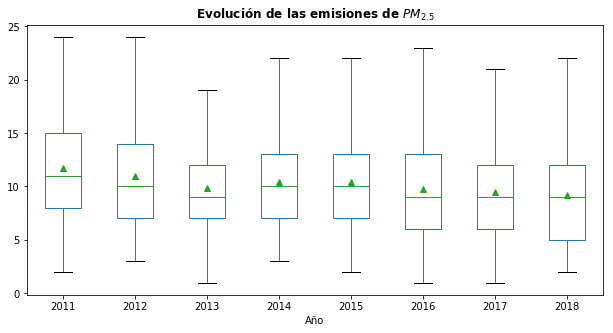

In [47]:
# Seleccionamos las columnas años y medidas para graficar:

t.boxplot(column = "Medida", by = "Año", figsize = (10,5), grid = False, 
          showmeans = True, showfliers = False)
plt.title("Evolución de las emisiones de $PM_{2.5}$",fontweight="bold")
plt.suptitle("")
plt.show()

La gráfica anterior nos proporciona bastante información. Lo primero que llama la atención que la media (triángulo) y la mediana suelen tener valores similares, lo que nos indica distribuciones que guardan, hasta cierto punto, cierta homogeneidad a lo largo de los años. Del mismo modo, salvo en el año 2013, se aprecia que el rango intercuantílico (el tamaño de la caja) es aproximadamente igual en todos los casos. Además, parece apreciarse una tendencia descendente en el periodo de tiempo analizado, lo que parece indicar que el número de $PM_{2.5}$ se ha ido reduciendo paulatinamente a lo largo de los años. Sin embargo, aunque parece apreciarse una tendencia, parece razonable evaluar si los cambios que se observan de año a año son significativos estadísticamente. Es decir, deberíamos poder comprobar si podemos decir con la suficente confianza que la media de cada año es menor que la del anterior y también si las medias de 2011 y 2018, inicio y fin del periodo también lo son. Para realizar comprobaciones entre estas variables es razonable llevar a cabo la verificación de la normalización y la homogeneidad de las varianzas.

Para la nomalización, se podría llevar a cabo un test de Saphiro. Sin embargo, debido a que son registros diarios de 24 estaciones y los estamos agrupando por años, podemos asumir que cada grupo tiene más de 30 registros y, por el teorema del límite central, podemos aproximarlo por una distribución normal.

En cuanto a la homogeneidad de las varianzas, podemos verificarla con el test de Fligner:

In [57]:
# Verificamos la homogeneidad de las varianzas:

res = stats.fligner(t[t["Año"]==2011]["Medida"],t[t["Año"]==2012]["Medida"],
                    t[t["Año"]==2013]["Medida"]
                   ,t[t["Año"]==2014]["Medida"],t[t["Año"]==2015]["Medida"],
                    t[t["Año"]==2016]["Medida"]
                   ,t[t["Año"]==2017]["Medida"],t[t["Año"]==2018]["Medida"])

print (res)

FlignerResult(statistic=174.46663008964165, pvalue=2.8685531305225686e-34)


Y nos da como resultado que no hay homogeneidad en las varianzas, un resultado que hay que tener en cuenta a la hora de realizar los test estadísticos que se realizan a continuación:

In [62]:
# Comparamos año a año y los dos extremos (2011 y 2018)

# 2011-2012
print ("\n P valor para 2011-2012: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2012]["Medida"],equal_var = False).pvalue)

# 2012-2013
print ("\n P valor para 2012-2013: ", 
       stats.ttest_ind(t[t["Año"]==2012]["Medida"],
                       t[t["Año"]==2013]["Medida"],equal_var = False).pvalue)

# 2013-2014
print ("\n P valor para 2013-2014: ", 
       stats.ttest_ind(t[t["Año"]==2013]["Medida"],
                       t[t["Año"]==2014]["Medida"],equal_var = False).pvalue)

# 2014-2015
print ("\n P valor para 2014-2015: ", 
       stats.ttest_ind(t[t["Año"]==2014]["Medida"],
                       t[t["Año"]==2015]["Medida"],equal_var = False).pvalue)

# 2015-2016
print ("\n P valor para 2015-2016: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2016]["Medida"],equal_var = False).pvalue)

# 2016-2017
print ("\n P valor para 2016-2017: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2017]["Medida"],equal_var = False).pvalue)

# 2017-2018
print ("\n P valor para 2017-2018: ", 
       stats.ttest_ind(t[t["Año"]==2017]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# 2011-2018
print ("\n P valor para 2011-2018: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# Reducción de las emisiones en el periodo:

print ("\nEl cambio en las emisiones en el periodo ha sido del :",
       (1-(np.mean(t[t["Año"]==2011]["Medida"])/np.mean(t[t["Año"]==2018]["Medida"]))))


 P valor para 2011-2012:  2.501495135737715e-07

 P valor para 2012-2013:  3.520398622215011e-18

 P valor para 2013-2014:  7.500839377760668e-06

 P valor para 2014-2015:  0.9409371442782475

 P valor para 2015-2016:  5.514636794125511e-05

 P valor para 2016-2017:  2.3208229002328165e-09

 P valor para 2017-2018:  0.03727719432155136

 P valor para 2011-2018:  7.936976808841853e-57

La reducción en las emisiones en el periodo ha sido del : -0.2775511442326717


Una vez realizados los t-test y comparándolos con la gráfica anterior, podemos llegar a las siguientes conclusiones:

- De 2011 a 2013 y de 2015 a 2018, las emisiones de $PM_{2.5}$ han visto una reducción estadísticamente significativa.
- De 2014 a 2015 , los niveles de emisión no han presentado cambios significativos
- De 2013 a 2014, los niveles de emisión crecieron de forma estadísticamente significativa.
- En el periodo de 2011 a 2018 se han reducido las emisiones casi un 28% de forma significativa.

## Análisis de $PM_{10}$

En esta sección, se analizan los resultados para $PM_{10}$. Siguiendo los pasos señalados, lo primero consisten en obtener los resúmenes estadísticos:

In [63]:
# Vamos a calcular los resumenes estadísticos para PM10:

t = datos[datos["Magnitud"] == lista[1]]

print(t["Medida"].describe())

count    33024.000000
mean        19.051447
std          9.408451
min          1.000000
25%         12.000000
50%         18.000000
75%         25.000000
max         48.000000
Name: Medida, dtype: float64


Se puede ver que el valor de la desviación estándar es practicamente la mitad del valor medio, lo que nos indica una gran variabilidad que podría estar explicada tanto por un progresivo descenso como por un alto impacto de las estaciones en las emisiones. Del mismo modo, se puede ver que el valor de la mediana y la media es prácticamente el mismo, aunque la diferencia es mayor que con el gas anterior, lo que indica que los valores extremos no tienen mucho efecto sobre la media y que se distribuyen de forma relativamente balanceada en su entorno. Para evaluar los valores medios anuales y su evolución, lo mejor es realizarlo mediante varios diagramas de cajas en los que también se incluya la medida de la media.

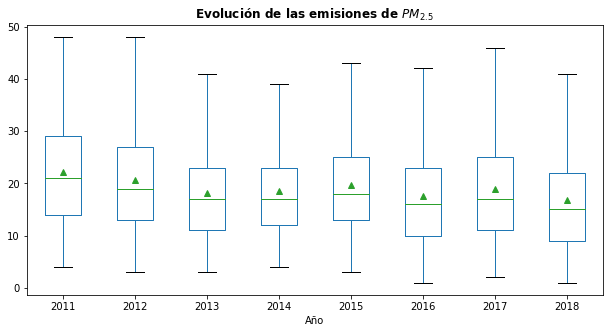

In [64]:
# Seleccionamos las columnas años y medidas para graficar:

t.boxplot(column = "Medida", by = "Año", figsize = (10,5), grid = False, 
          showmeans = True, showfliers = False)
plt.title("Evolución de las emisiones de $PM_{10}$",fontweight="bold")
plt.suptitle("")
plt.show()

A diferencia de la gráfica del gas anterior, para las PM10, aunque también hay una tendencia decreciente, no es tan clara. De hecho, se puede ver un claro repunte de las emisiones entre 2013 y 2015, que habrá que evaluar si es estadísticamente significativo o no.Para realizar comprobaciones entre estas variables es razonable llevar a cabo la verificación de la normalización y la homogeneidad de las varianzas.

Para la nomalización, se podría llevar a cabo un test de Saphiro. Sin embargo, debido a que son registros diarios y los estamos agrupando por años, podemos asumir que cada grupo tiene más de 30 registros y, por el teorema del límite central, podemos aproximarlo por una distribución normal.

En cuanto a la homogeneidad de las varianzas, podemos verificarla con el test de Fligner:

In [65]:
# Verificamos la homogeneidad de las varianzas:

res = stats.fligner(t[t["Año"]==2011]["Medida"],t[t["Año"]==2012]["Medida"],
                    t[t["Año"]==2013]["Medida"]
                   ,t[t["Año"]==2014]["Medida"],t[t["Año"]==2015]["Medida"],
                    t[t["Año"]==2016]["Medida"]
                   ,t[t["Año"]==2017]["Medida"],t[t["Año"]==2018]["Medida"])

print (res)

FlignerResult(statistic=213.93302453850328, pvalue=1.2786465486084101e-42)


Y nos da como resultado que no hay homogeneidad en las varianzas, un resultado que hay que tener en cuenta a la hora de realizar los test estadísticos que se realizan a continuación:

In [66]:
# Comparamos año a año y los dos extremos (2011 y 2018)

# 2011-2012
print ("\n P valor para 2011-2012: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2012]["Medida"],equal_var = False).pvalue)

# 2012-2013
print ("\n P valor para 2012-2013: ", 
       stats.ttest_ind(t[t["Año"]==2012]["Medida"],
                       t[t["Año"]==2013]["Medida"],equal_var = False).pvalue)

# 2013-2014
print ("\n P valor para 2013-2014: ", 
       stats.ttest_ind(t[t["Año"]==2013]["Medida"],
                       t[t["Año"]==2014]["Medida"],equal_var = False).pvalue)

# 2014-2015
print ("\n P valor para 2014-2015: ", 
       stats.ttest_ind(t[t["Año"]==2014]["Medida"],
                       t[t["Año"]==2015]["Medida"],equal_var = False).pvalue)

# 2015-2016
print ("\n P valor para 2015-2016: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2016]["Medida"],equal_var = False).pvalue)

# 2016-2017
print ("\n P valor para 2016-2017: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2017]["Medida"],equal_var = False).pvalue)

# 2017-2018
print ("\n P valor para 2017-2018: ", 
       stats.ttest_ind(t[t["Año"]==2017]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# 2011-2018
print ("\n P valor para 2011-2018: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# Reducción de las emisiones en el periodo:

print ("\nEl cambio en las emisiones en el periodo ha sido del :",
       (1-(np.mean(t[t["Año"]==2011]["Medida"])/np.mean(t[t["Año"]==2018]["Medida"]))))


 P valor para 2011-2012:  1.7412189233816207e-14

 P valor para 2012-2013:  9.25277325975586e-35

 P valor para 2013-2014:  0.021349189894107366

 P valor para 2014-2015:  2.015032033754815e-10

 P valor para 2015-2016:  2.1796255190850166e-27

 P valor para 2016-2017:  9.11859379319209e-06

 P valor para 2017-2018:  8.836363927130135e-22

 P valor para 2011-2018:  2.8446520329823265e-127

El cambio en las emisiones en el periodo ha sido del : -0.3217112134070361


Una vez realizados los t-test y comparándolos con la gráfica anterior, podemos llegar a las siguientes conclusiones:

- De 2011 a 2013 y de 2015 a 2016 y de 2017 a 2018, las emisiones de $PM_{10}$ han visto una reducción estadísticamente significativa.
- No ha habido ningún salto de años en el los niveles de emisión no han presentado cambios significativos
- De 2013 a 2014 y de 2016 a 2017 los niveles de emisión crecieron de forma estadísticamente significativa.
- En el periodo de 2011 a 2018 se han reducido las emisiones  un 32% de forma estadisticamente significativa.

## Análisis de $O_{3}$

En esta sección, se analizan los resultados para $O_{3}$. Siguiendo los pasos señalados, lo primero consisten en obtener los resúmenes estadísticos:

In [67]:
# Vamos a calcular los resumenes estadísticos para O3:

t = datos[datos["Magnitud"] == lista[2]]

print(t["Medida"].describe())

count    39751.000000
mean        48.895273
std         24.279782
min          1.000000
25%         30.000000
50%         50.000000
75%         67.000000
max        121.000000
Name: Medida, dtype: float64


De manera análoga a los gases anteriormente comentados, se puede ver que la desviación estándar es la mitad del valor medio, lo que nos indica una alta variabilidad en la muestra, que puede deberse a mucho factores, como una significativa evolución temporal. Del mismo modo que los otros gases, la media y la mediana presentan valores similares, lo que apunta a un reparto relativamente balanceado de los valores a ambos lados de la media.

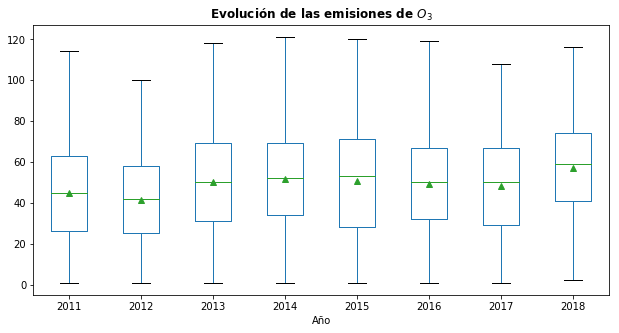

In [68]:
# Seleccionamos las columnas años y medidas para graficar:

t.boxplot(column = "Medida", by = "Año", figsize = (10,5), 
          grid = False, showmeans = True, showfliers = False)
plt.title("Evolución de las emisiones de $O_{3}$",fontweight="bold")
plt.suptitle("")
plt.show()

Y, al comparalo con las gráficas anteriores, aparece la primera sorpresa. Las emisiones de Ozono han crecido de forma sostenida desde 2011 a 2018. Principalmente, se encuentra dos puntos principales, pues de 2012 a 2013 y de 2017 a 2018 parece crecer bastante, mientras que en el resto de los años o no varía o decrecen ligeramente. Podremos comprobar entre qué años se dieron cambios realmente significativos con los test estadísticos.

Para la nomalización, se podría llevar a cabo un test de Saphiro. Sin embargo, debido a que son registros diarios y los estamos agrupando por años, podemos asumir que cada grupo tiene más de 30 registros y, por el teorema del límite central, podemos aproximarlo por una distribución normal.

En cuanto a la homogeneidad de las varianzas, podemos verificarla con el test de Fligner:

In [69]:
# Verificamos la homogeneidad de las varianzas:

res = stats.fligner(t[t["Año"]==2011]["Medida"],t[t["Año"]==2012]["Medida"],
                    t[t["Año"]==2013]["Medida"]
                   ,t[t["Año"]==2014]["Medida"],t[t["Año"]==2015]["Medida"],
                    t[t["Año"]==2016]["Medida"]
                   ,t[t["Año"]==2017]["Medida"],t[t["Año"]==2018]["Medida"])

print (res)

FlignerResult(statistic=509.3811224997736, pvalue=7.709348182326464e-106)


Y nos da como resultado que no hay homogeneidad en las varianzas, un resultado que hay que tener en cuenta a la hora de realizar los test estadísticos que se realizan a continuación:

In [70]:
# Comparamos año a año y los dos extremos (2011 y 2018)

# 2011-2012
print ("\n P valor para 2011-2012: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2012]["Medida"],equal_var = False).pvalue)

# 2012-2013
print ("\n P valor para 2012-2013: ", 
       stats.ttest_ind(t[t["Año"]==2012]["Medida"],
                       t[t["Año"]==2013]["Medida"],equal_var = False).pvalue)

# 2013-2014
print ("\n P valor para 2013-2014: ", 
       stats.ttest_ind(t[t["Año"]==2013]["Medida"],
                       t[t["Año"]==2014]["Medida"],equal_var = False).pvalue)

# 2014-2015
print ("\n P valor para 2014-2015: ", 
       stats.ttest_ind(t[t["Año"]==2014]["Medida"],
                       t[t["Año"]==2015]["Medida"],equal_var = False).pvalue)

# 2015-2016
print ("\n P valor para 2015-2016: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2016]["Medida"],equal_var = False).pvalue)

# 2016-2017
print ("\n P valor para 2016-2017: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2017]["Medida"],equal_var = False).pvalue)

# 2017-2018
print ("\n P valor para 2017-2018: ", 
       stats.ttest_ind(t[t["Año"]==2017]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# 2011-2018
print ("\n P valor para 2011-2018: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# Reducción de las emisiones en el periodo:

print ("\nEl cambio en las emisiones en el periodo ha sido del :",
       (1-(np.mean(t[t["Año"]==2011]["Medida"])/np.mean(t[t["Año"]==2018]["Medida"]))))


 P valor para 2011-2012:  4.029728955954956e-18

 P valor para 2012-2013:  1.0631597250388239e-80

 P valor para 2013-2014:  0.0006495593148965212

 P valor para 2014-2015:  0.027569018688873324

 P valor para 2015-2016:  0.003460738471040902

 P valor para 2016-2017:  1.0814070699561873e-05

 P valor para 2017-2018:  5.809599063564091e-70

 P valor para 2011-2018:  7.464542947052577e-131

El cambio en las emisiones en el periodo ha sido del : 0.21064943292153226


Una vez realizados los t-test y comparándolos con la gráfica anterior, podemos llegar a las siguientes conclusiones:

- De 2011 a 2012 y de 2014 a 2017 las emisiones de $O_{3}$ han visto una reducción estadísticamente significativa, aunque muy moderada.
- No ha habido ningún salto de años en el los niveles de emisión no han presentado cambios significativos
- De 2012 a 2014 y de 2017 a 2018 los niveles de emisión crecieron de forma estadísticamente significativa.
- En el periodo de 2011 a 2018 se han incrementado las emisiones un 21% de forma estadisticamente significativa.

## Análisis de $NO_{2}$

En esta sección, se analizan los resultados para $NO_{2}$. Siguiendo los pasos señalados, lo primero consisten en obtener los resúmenes estadísticos:

In [71]:
# Vamos a calcular los resumenes estadísticos para NO2:

t = datos[datos["Magnitud"] == lista[3]]

print(t["Medida"].describe())

count    67439.000000
mean        37.831685
std         19.085459
min          1.000000
25%         23.000000
50%         35.000000
75%         50.000000
max         95.000000
Name: Medida, dtype: float64


De manera análoga a los gases anteriormente comentados, se puede ver que la desviación estándar es la mitad del valor medio, lo que nos indica una alta variabilidad en la muestra, que puede deberse a mucho factores, como una significativa evolución temporal. Del mismo modo que los otros gases, la media y la mediana presentan valores similares, lo que apunta a un reparto relativamente balanceado de los valores a ambos lados de la media.

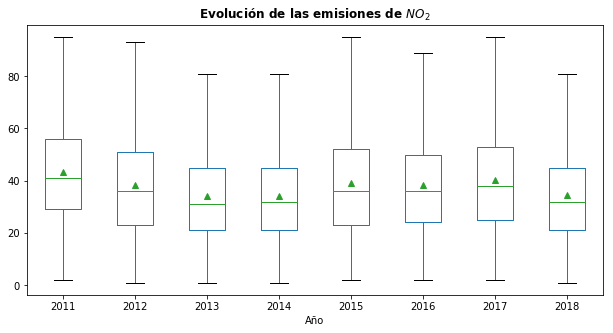

In [77]:
# Seleccionamos las columnas años y medidas para graficar:

t.boxplot(column = "Medida", by = "Año", figsize = (10,5), 
          grid = False, showmeans = True, showfliers = False)
plt.title("Evolución de las emisiones de $NO_{2}$",fontweight="bold")
plt.suptitle("")
plt.show()

De forma similar a las partículas y diferente al Ozono, el $NO_{2}$ presenta una clara tendencia a la baja muy acusada en los primeros años (2011-2013) y luego relativamente plana hasta 2017-2018, donde parece volver a bajar. Es de notar que, a diferencia de los casos anteriores, donde la media y la mediana casi siempre coincidían, en este caso la media siempre se encuentra ligeramente por encima de la mediana. Podemos comprobar si los cambios que hemos señalado anteriormente parecen ser significativos estadísticamente o no. Para esto resulta interesante determinar la normalidad de los datos y también la homogeneidad de las varianzas.

Para la nomalización, se podría llevar a cabo un test de Saphiro. Sin embargo, debido a que son registros diarios de 24 estaciones y los estamos agrupando por años, podemos asumir que cada grupo tiene más de 30 registros y, por el teorema del límite central, podemos aproximarlo por una distribución normal.

En cuanto a la homogeneidad de las varianzas, podemos verificarla con el test de Fligner:

In [73]:
# Verificamos la homogeneidad de las varianzas:

res = stats.fligner(t[t["Año"]==2011]["Medida"],t[t["Año"]==2012]["Medida"],
                    t[t["Año"]==2013]["Medida"]
                   ,t[t["Año"]==2014]["Medida"],t[t["Año"]==2015]["Medida"],
                    t[t["Año"]==2016]["Medida"]
                   ,t[t["Año"]==2017]["Medida"],t[t["Año"]==2018]["Medida"])

print (res)

FlignerResult(statistic=438.12229461280276, pvalue=1.5767091550299298e-90)


Y nos da como resultado que no hay homogeneidad en las varianzas, un resultado que hay que tener en cuenta a la hora de realizar los test estadísticos que se realizan a continuación:

In [74]:
# Comparamos año a año y los dos extremos (2011 y 2018)

# 2011-2012
print ("\n P valor para 2011-2012: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2012]["Medida"],equal_var = False).pvalue)

# 2012-2013
print ("\n P valor para 2012-2013: ", 
       stats.ttest_ind(t[t["Año"]==2012]["Medida"],
                       t[t["Año"]==2013]["Medida"],equal_var = False).pvalue)

# 2013-2014
print ("\n P valor para 2013-2014: ", 
       stats.ttest_ind(t[t["Año"]==2013]["Medida"],
                       t[t["Año"]==2014]["Medida"],equal_var = False).pvalue)

# 2014-2015
print ("\n P valor para 2014-2015: ", 
       stats.ttest_ind(t[t["Año"]==2014]["Medida"],
                       t[t["Año"]==2015]["Medida"],equal_var = False).pvalue)

# 2015-2016
print ("\n P valor para 2015-2016: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2016]["Medida"],equal_var = False).pvalue)

# 2016-2017
print ("\n P valor para 2016-2017: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2017]["Medida"],equal_var = False).pvalue)

# 2017-2018
print ("\n P valor para 2017-2018: ", 
       stats.ttest_ind(t[t["Año"]==2017]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# 2011-2018
print ("\n P valor para 2011-2018: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# Reducción de las emisiones en el periodo:

print ("\nEl cambio en las emisiones en el periodo ha sido del :",
       (1-(np.mean(t[t["Año"]==2011]["Medida"])/np.mean(t[t["Año"]==2018]["Medida"]))))


 P valor para 2011-2012:  1.6584576006646066e-70

 P valor para 2012-2013:  7.164457958215856e-47

 P valor para 2013-2014:  0.7521493510256927

 P valor para 2014-2015:  1.0974408700349393e-66

 P valor para 2015-2016:  0.001037853581351742

 P valor para 2016-2017:  0.00011127810577187848

 P valor para 2017-2018:  4.7403984582886865e-89

 P valor para 2011-2018:  9.41508705682301e-205

El cambio en las emisiones en el periodo ha sido del : -0.26528792216275643


Una vez realizados los t-test y comparándolos con la gráfica anterior, podemos llegar a las siguientes conclusiones:

- De 2011 a 2013 y de 2015 a 2016 y de 2017 a 2018 las emisiones de $NO_{2}$ han visto una reducción estadísticamente significativa.
- De 2013 a 2014 los niveles de emisión no han presentado cambios significativos.
- De 2014 a 2015 y de 2016 a 2017 los niveles de emisión crecieron de forma estadísticamente significativa.
- En el periodo de 2011 a 2018 se han reducido las emisiones un 27% de forma estadisticamente significativa.

## Análisis de $SO_{2}$

En esta sección, se analizan los resultados para $SO_{2}$. Siguiendo los pasos señalados, lo primero consisten en obtener los resúmenes estadísticos:

In [78]:
# Vamos a calcular los resumenes estadísticos para SO2:

t = datos[datos["Magnitud"] == lista[4]]

print(t["Medida"].describe())

count    27325.000000
mean         5.454346
std          3.179500
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         15.000000
Name: Medida, dtype: float64


De manera análoga a los gases anteriormente comentados, se puede ver que la desviación estándar es la mitad del valor medio, lo que nos indica una alta variabilidad en la muestra, que puede deberse a mucho factores, como una significativa evolución temporal. Del mismo modo que los otros gases, la media y la mediana presentan valores similares, lo que apunta a un reparto relativamente balanceado de los valores a ambos lados de la media.

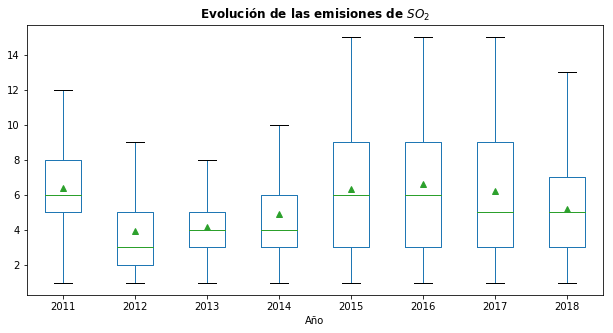

In [79]:
# Seleccionamos las columnas años y medidas para graficar:

t.boxplot(column = "Medida", by = "Año", figsize = (10,5), 
          grid = False, showmeans = True, showfliers = False)
plt.title("Evolución de las emisiones de $SO_{2}$",fontweight="bold")
plt.suptitle("")
plt.show()

En base a la gráfica anterior, el comportamiento del $SO_{2}$ es más parecido al del Ozono, salvo por la aparente tendencia  a la baja de los dos últimos años. Este también es el caso en el que la media y la mediana se encuentran mas separadas, dando a entender que los valores por encima de la mediana se encuentran mas espaciados y la distribución es menos simétrica respecto a la mediana. Se observan descensos grandes entre 2011 y 2012 y 2017 y 2018 y un crecimiento sostenido de las emisiones desde 2012 a 2016. No obstante, se determinará cuales de estos crecimientos son significativos estadísticamente y cuales no lo son. Para ello, un paso previo razonable es del de comprobar la normalidad y la homogeneidad de la varianza.
Para la nomalización, se podría llevar a cabo un test de Saphiro. Sin embargo, debido a que son registros diarios de 24 estaciones y los estamos agrupando por años, podemos asumir que cada grupo tiene más de 30 registros y, por el teorema del límite central, podemos aproximarlo por una distribución normal.

En cuanto a la homogeneidad de las varianzas, podemos verificarla con el test de Fligner:


In [80]:
# Verificamos la homogeneidad de las varianzas:

res = stats.fligner(t[t["Año"]==2011]["Medida"],t[t["Año"]==2012]["Medida"],
                    t[t["Año"]==2013]["Medida"]
                   ,t[t["Año"]==2014]["Medida"],t[t["Año"]==2015]["Medida"],
                    t[t["Año"]==2016]["Medida"]
                   ,t[t["Año"]==2017]["Medida"],t[t["Año"]==2018]["Medida"])

print (res)

FlignerResult(statistic=1696.0618425992504, pvalue=0.0)


Y nos da como resultado que no hay homogeneidad en las varianzas, un resultado que hay que tener en cuenta a la hora de realizar los test estadísticos que se realizan a continuación:

In [81]:
# Comparamos año a año y los dos extremos (2011 y 2018)

# 2011-2012
print ("\n P valor para 2011-2012: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2012]["Medida"],equal_var = False).pvalue)

# 2012-2013
print ("\n P valor para 2012-2013: ", 
       stats.ttest_ind(t[t["Año"]==2012]["Medida"],
                       t[t["Año"]==2013]["Medida"],equal_var = False).pvalue)

# 2013-2014
print ("\n P valor para 2013-2014: ", 
       stats.ttest_ind(t[t["Año"]==2013]["Medida"],
                       t[t["Año"]==2014]["Medida"],equal_var = False).pvalue)

# 2014-2015
print ("\n P valor para 2014-2015: ", 
       stats.ttest_ind(t[t["Año"]==2014]["Medida"],
                       t[t["Año"]==2015]["Medida"],equal_var = False).pvalue)

# 2015-2016
print ("\n P valor para 2015-2016: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2016]["Medida"],equal_var = False).pvalue)

# 2016-2017
print ("\n P valor para 2016-2017: ", 
       stats.ttest_ind(t[t["Año"]==2015]["Medida"],
                       t[t["Año"]==2017]["Medida"],equal_var = False).pvalue)

# 2017-2018
print ("\n P valor para 2017-2018: ", 
       stats.ttest_ind(t[t["Año"]==2017]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# 2011-2018
print ("\n P valor para 2011-2018: ", 
       stats.ttest_ind(t[t["Año"]==2011]["Medida"],
                       t[t["Año"]==2018]["Medida"],equal_var = False).pvalue)

# Reducción de las emisiones en el periodo:

print ("\nEl cambio en las emisiones en el periodo ha sido del :",
       (1-(np.mean(t[t["Año"]==2011]["Medida"])/np.mean(t[t["Año"]==2018]["Medida"]))))


 P valor para 2011-2012:  2.5125664950312604e-278

 P valor para 2012-2013:  7.971211709386303e-05

 P valor para 2013-2014:  3.0274488326841947e-34

 P valor para 2014-2015:  1.1993301179620307e-81

 P valor para 2015-2016:  0.0004404095625782917

 P valor para 2016-2017:  0.1995240009135321

 P valor para 2017-2018:  6.883669538585356e-37

 P valor para 2011-2018:  3.849077088488397e-70

El cambio en las emisiones en el periodo ha sido del : -0.22752936511298394


Una vez realizados los t-test y comparándolos con la gráfica anterior, podemos llegar a las siguientes conclusiones:

- De 2011 a 2012 y de 2017 a 2018 las emisiones de $SO_{2}$ han visto una reducción estadísticamente significativa.
- De 2016 a 2017 los niveles de emisión no han presentado cambios significativos.
- De 2012 a 2016 los niveles de emisión crecieron de forma estadísticamente significativa.
- En el periodo de 2011 a 2018 se han reducido las emisiones un 23% de forma estadisticamente significativa.


# Conclusiones y descarga de los datos "limpios"


A lo largo de la práctica se han realizado las siguientes tareas:

- Integración de datos de diferentes documentos en un mismo Dataset, uniformando la estructura.
- Corregido los errores subsanables y eliminado los registros con errores no subsanables.
- Analizado los valores extremos presentes en los datos y determinado su eliminación.
- Analizado si los cambios anuales en las emisiones son estadísticamente significativos y evaluar la tendencia que dichas emisiones han realizado.

A raiz de estas tareas, en particular la información obtenida a partir del análisis de la evolución de las emisiones de los cinco gases considerados se puede llegar a la conclusión de que las emisiones de cuatro de los cinco gases se redujeron de forma significativa en todo el periodo, mientras que las emisiones de Ozono crecieron de forma estadísticamente significativa durante el periodo. Del mismo modo, la tendencia en todos los gases suele ser bastante suave, sin cambios grandes en las emisiones, lo que en muchos casos deja variaciones no significativas estadísticamente entre varios años. Sin embargo, tanto el aumento de las emisiones de Ozono como del descenso de los demás gases vienen muy influido por descensos localizados en determinados años: 

- Entre 2011 y 2013 es un periodo con cambios significativos
- Entre 2017 y 2018 también hay cambios significativos
- El resto de los años, no presentan cambios significativos o si son significativos, son muy suaves.

Finalmente, además de llevar a cabo el análisis, se exporta el fichero de los datos analizados en formato csv:

In [33]:
# Se exportan los datos en un fichero csv:

datos.to_csv(".\datos_procesados\datos_procesados.csv", index = False)

# Fuentes utilizadas

- Madrid.es. (2017). Plan de Calidad del Aire y Cambio climático. [online] Available at: https://www.madrid.es/UnidadesDescentralizadas/Sostenibilidad/CalidadAire/Ficheros/PlanAireyCC_092017.pdf [Accessed 2 Jan. 2019].


- MuniMadrid. (2009). Plan de Calidad del Aire Madrid 2011-2015. [online] Available at: http://www.mambiente.munimadrid.es/opencms/export/sites/default/calaire/Anexos/Plan_2011_15.pdf [Accessed 1 Jan. 2019].

- Datos.madrid.es. (2018). Calidad del aire. Datos diarios años 2001 a 2018 - Portal de datos abiertos del Ayuntamiento de Madrid. [online] Available at: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=aecb88a7e2b73410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default [Accessed 3 Jan. 2019].

- WHO. (2018). Ambient (outdoor) air quality and health. [online] Available at: https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health [Accessed 2 Jan. 2019].


- Matplotlib.org. (n.d.). Matplotlib: Python plotting — Matplotlib 3.0.2 documentation. [online] Available at: https://matplotlib.org/index.html [Accessed 5 Jan. 2019].

- Pandas.pydata.org. (n.d.). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Available at: https://pandas.pydata.org/ [Accessed 5 Jan. 2019].

- Rovira, C. (2008). Contraste de hipótesis. Material UOC.